In [227]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from functions import get_datasets, get_target_id
import glob
import os
from q_value_calc_crosslinks import calcQ
import re

In [228]:
i = 1
class_threshold = 500
dataset = get_datasets()

In [229]:
# define output path for plots
output_path = f"../results/{dataset[i]['type']}/{dataset[i]['name']}/{class_threshold}/"
if not os.path.exists(output_path):
    os.makedirs(output_path)

In [230]:
# read original and additional file
input_trunk = f"../data/{dataset[i]['type']}/{dataset[i]['name']}/"
input_file_original = input_trunk + f"{dataset[i]['file']}.pkl"
input_file_perc =  input_trunk + f"{dataset[i]['file']}_{dataset[i]['comparison']}.pkl"

df_original = pd.read_pickle(input_file_original)
if dataset[i]['comparison'] != None:
    df_perc = pd.read_pickle(input_file_perc)
input_trunk += f"{class_threshold}/"

## Default

In [231]:
# read default svm files
input_path = input_trunk + "default/"
# read default svm dataframes
svm_file = input_path + f"{dataset[i]['file']}_svm.pkl"
df_svm_default_bottom = pd.read_pickle(svm_file)

In [232]:
def plot_pseudo_roc(df_original, df_svm, df_comparison, decoy_label , output_path = output_path):

    max_iterations = -1
    for col in df_svm.columns:
        if re.search("Score_\d*", col )!= None:
            max_iterations += 1

    plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.viridis(np.linspace(0,1,max_iterations)))
    fig, axs = plt.subplots(len(np.unique(df_original[dataset[i]['group']])))
    for j in np.unique(df_original[dataset[i]['group']]):
        for k in range(1,max_iterations+1):
            q_val = f'class-specific_q-val_{k}'
            target_ids = f'cum_target_id_{k}'
            df_svm.sort_values(q_val, ascending=True, inplace=True)
            axs[j].step(df_svm.loc[(df_svm[dataset[i]['group']]== j) & (df_svm[q_val]<= 0.1), q_val],
                        df_svm.loc[(df_svm[dataset[i]['group']]== j) & (df_svm[q_val]<= 0.1), target_ids], 
                        label=f"iter {k} ({np.all([(df_svm[dataset[i]['group']]== j), ~np.isnan(df_svm[q_val])], axis=0).sum()})")
        q_val = f'class-specific_q-val'
        target_ids = f'cum_target_id'
        df_original.sort_values(q_val, ascending=True, inplace=True)
        axs[j].step(df_original.loc[(df_original[dataset[i]['group']]== j) & (df_original[q_val]<= 0.1), q_val],
                    df_original.loc[(df_original[dataset[i]['group']]== j) & (df_original[q_val]<= 0.1), 'cum_target_id'], 
                    label=f"original ({np.all([(df_original[dataset[i]['group']]== j), ~np.isnan(df_original[q_val])], axis=0).sum()})", color = "black")
        if dataset[i]['comparison'] != None:
            axs[j].step(df_comparison.loc[(df_comparison[dataset[i]['group']]== j) & (df_comparison[q_val]<= 0.1), q_val],
                        df_comparison.loc[(df_comparison[dataset[i]['group']]== j) & (df_comparison[q_val]<= 0.1), 'cum_target_id'], 
                        label=f"{dataset[i]['comparison']} ({np.all([(df_comparison[dataset[i]['group']]== j), ~np.isnan(df_comparison[q_val])], axis=0).sum()})" , color = "gray")
        axs[j].set_xlim(0,0.1)
        axs[j].set_title(f"{dataset[i]['group']} = {j}")
        axs[j].set_xlabel("q-value")
        axs[j].set_ylabel("no. target IDs")
        lgd = axs[j].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    fig.suptitle(dataset[i]['name'] + "\n decoy: " + decoy_label)
    fig.tight_layout()
    #plt.savefig(output_path + f"{dataset[i]['name']}_second_decoy.png",bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.show()

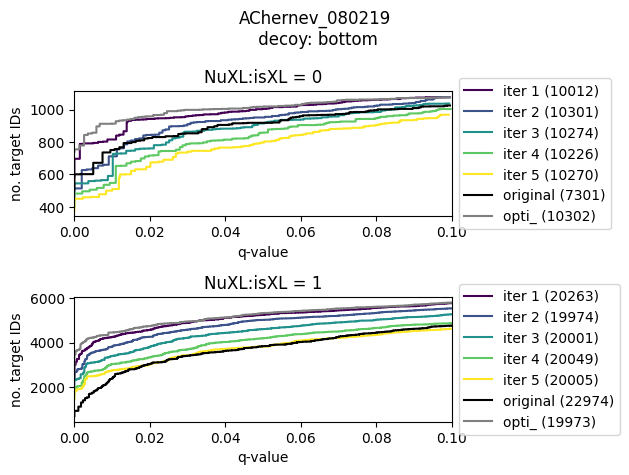

In [233]:
plot_pseudo_roc(df_original, df_svm_default_bottom, df_perc, "bottom")

## Peptide unique

In [234]:
input_path = input_trunk + "pep_unique/"
# read svm with decoy second files
svm_file = input_path + f"{dataset[i]['file']}_svm.pkl"
df_svm_pep = pd.read_pickle(svm_file)

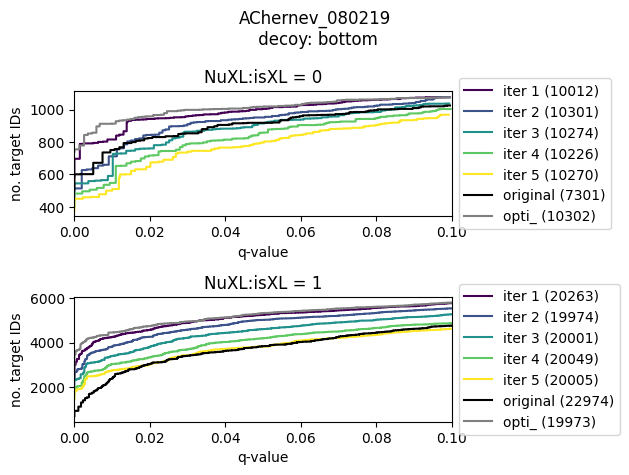

In [235]:
plot_pseudo_roc(df_original, df_svm_pep, df_perc, "bottom")

## Decoy Choice

### Decoy second

In [236]:
input_path = input_trunk + "default/decoy_second/"
# read svm with decoy second files
svm_file = input_path + f"{dataset[i]['file']}_svm.pkl"
df_svm_second_decoy = pd.read_pickle(svm_file)

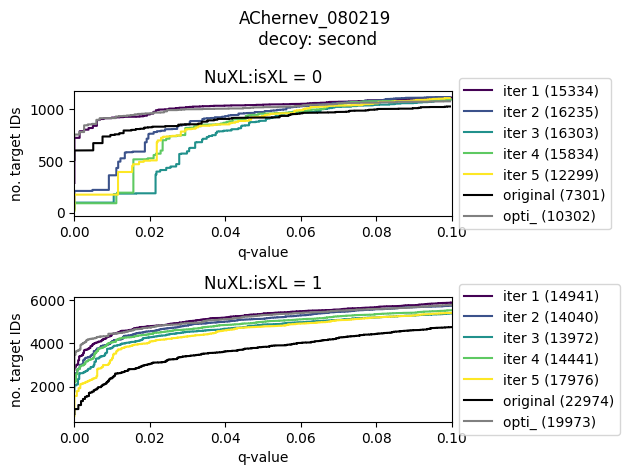

In [237]:
plot_pseudo_roc(df_original, df_svm_second_decoy, df_perc, "second")

### Decoy Last

In [238]:
input_path = input_trunk + "default/decoy_last/"
# read svm with decoy last files
svm_file = input_path + f"{dataset[i]['file']}_svm.pkl"
df_svm_last_decoy = pd.read_pickle(svm_file)

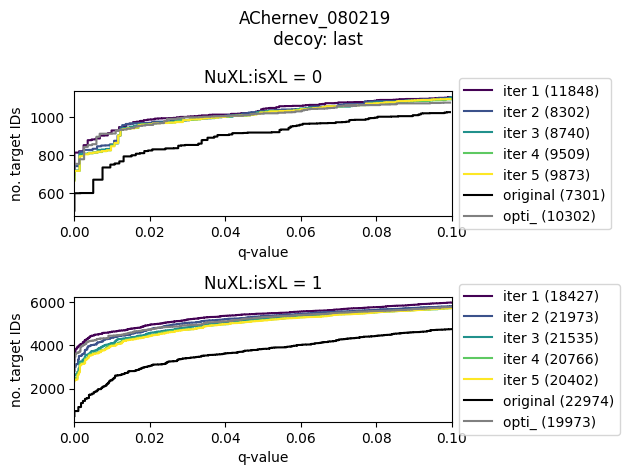

In [239]:
plot_pseudo_roc(df_original, df_svm_last_decoy, df_perc, "last")

### Decoy Bottom+Last

In [240]:
input_path = input_trunk + "default/decoy_bottom+last/"
# read svm with decoy last files
svm_file = input_path + f"{dataset[i]['file']}_svm.pkl"
df_svm_bottom_last_decoy = pd.read_pickle(svm_file)

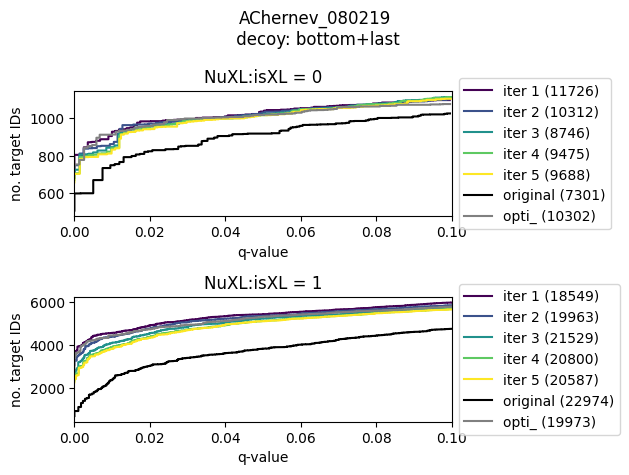

In [ ]:
plot_pseudo_roc(df_original, df_svm_bottom_last_decoy, df_perc, "bottom+last")

### Decoy Bottom+second

In [242]:
input_path = input_trunk + "default/decoy_bottom+second/"
# read svm with decoy last files
svm_file = input_path + f"{dataset[i]['file']}_svm.pkl"
df_svm_bottom_second_decoy = pd.read_pickle(svm_file)

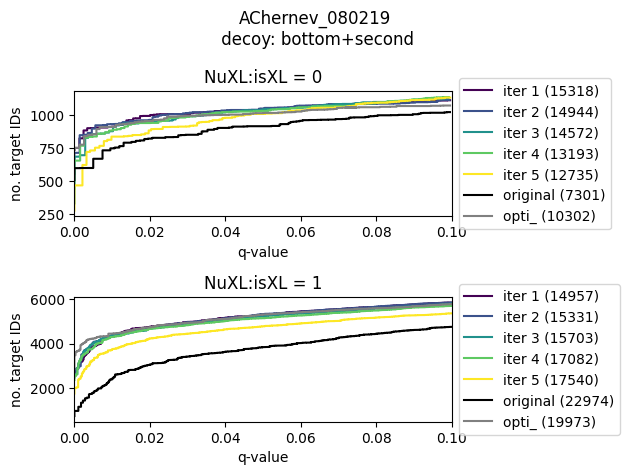

In [243]:
plot_pseudo_roc(df_original,df_svm_bottom_second_decoy, df_perc, "bottom+second")

### Comparison Decoy Choice

NameError: name 'dfs_svm' is not defined

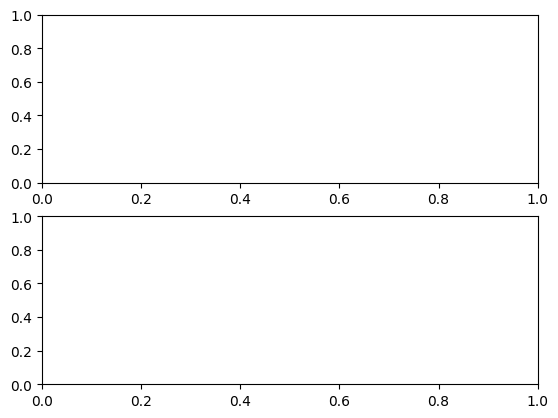

In [244]:
q_val = 'class-specific_q-val'

plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.viridis(np.linspace(0,1,len(dfs_svm_peptide))))
fig, axs = plt.subplots(len(np.unique(df_original[dataset[i]['group']])))
for j in np.unique(df_original[dataset[i]['group']]):
    axs[j].step(dfs_svm[0].loc[(dfs_svm[0][dataset[i]['group']]== j) & (dfs_svm[0][q_val]<= 0.1), q_val],dfs_svm[0].loc[(dfs_svm[0][dataset[i]['group']]== j) & (dfs_svm[0][q_val]<= 0.1), 'cum_target_id'], color = "red", label=f"decoy bottom({len(dfs_svm[0][dfs_svm[0][dataset[i]['group']]== j])})")
    axs[j].step(dfs_svm_second_decoy[0].loc[(dfs_svm_second_decoy[0][dataset[i]['group']]== j) & (dfs_svm_second_decoy[0][q_val]<= 0.1), q_val],dfs_svm_second_decoy[0].loc[(dfs_svm_second_decoy[0][dataset[i]['group']]== j) & (dfs_svm_second_decoy[0][q_val]<= 0.1), 'cum_target_id'], label=f"decoy second rank({len(dfs_svm_second_decoy[0][dfs_svm_second_decoy[0][dataset[i]['group']]== j])})")
    #axs[j].step(dfs_svm_peptide[0].loc[(dfs_svm_peptide[0][dataset[i]['group']]== j) & (dfs_svm_peptide[0][q_val]<= 0.1), q_val],dfs_svm_peptide[0].loc[(dfs_svm_peptide[0][dataset[i]['group']]== j) & (dfs_svm_peptide[0][q_val]<= 0.1), 'cum_target_id'], label=f"peptide iter 1 ({len(dfs_svm_peptide[0][dfs_svm_peptide[0][dataset[i]['group']]== j])})")
    axs[j].step(dfs_svm_last[0].loc[(dfs_svm_last[0][dataset[i]['group']]== j) & (dfs_svm_last[0][q_val]<= 0.1), q_val],dfs_svm_last[0].loc[(dfs_svm_last[0][dataset[i]['group']]== j) & (dfs_svm_last[0][q_val]<= 0.1), 'cum_target_id'], label=f"decoy last rank({len(dfs_svm_last[0][dfs_svm_last[0][dataset[i]['group']]== j])})")
    axs[j].step(dfs_svm_bottom_last[0].loc[(dfs_svm_bottom_last[0][dataset[i]['group']]== j) & (dfs_svm_bottom_last[0][q_val]<= 0.1), q_val],dfs_svm_bottom_last[0].loc[(dfs_svm_bottom_last[0][dataset[i]['group']]== j) & (dfs_svm_bottom_last[0][q_val]<= 0.1), 'cum_target_id'], label=f"decoy bottom+last rank({len(dfs_svm_bottom_last[0][dfs_svm_bottom_last[0][dataset[i]['group']]== j])})")
    axs[j].step(dfs_svm_bottom_second[0].loc[(dfs_svm_bottom_second[0][dataset[i]['group']]== j) & (dfs_svm_bottom_second[0][q_val]<= 0.1), q_val],dfs_svm_bottom_second[0].loc[(dfs_svm_bottom_second[0][dataset[i]['group']]== j) & (dfs_svm_bottom_second[0][q_val]<= 0.1), 'cum_target_id'], label=f"decoy bottom+second rank({len(dfs_svm_bottom_second[0][dfs_svm_bottom_second[0][dataset[i]['group']]== j])})")
    axs[j].step(df_original.loc[(df_original[dataset[i]['group']]== j) & (df_original[q_val]<= 0.1), q_val],df_original.loc[(df_original[dataset[i]['group']]== j) & (df_original[q_val]<= 0.1), 'cum_target_id'], label=f"original ({len(df_original[df_original[dataset[i]['group']]== j])})", color = "black")
    if dataset[i]['comparison'] != None:
        axs[j].step(df_perc.loc[(df_perc[dataset[i]['group']]== j) & (df_perc[q_val]<= 0.1), q_val],df_perc.loc[(df_perc[dataset[i]['group']]== j) & (df_perc[q_val]<= 0.1), 'cum_target_id'], label=f"{dataset[i]['comparison']} ({len(df_perc[df_perc[dataset[i]['group']]== j])})" , color = "gray")
    axs[j].set_xlim(0,0.1)
    axs[j].set_title(f"{dataset[i]['group']} = {j}")
    axs[j].set_xlabel("q-value")
    axs[j].set_ylabel("no. target IDs")
    lgd = axs[j].legend(loc='center left', bbox_to_anchor=(1, 0.5))
tit = fig.suptitle(f"Comparison Decoy Choice\n{dataset[i]['name']}\nFirst Iteration")
fig.tight_layout()
plt.savefig(output_path + f"{dataset[i]['name']}_comparison_decoy_choice_iter_1.png",bbox_extra_artists=(lgd,tit), bbox_inches='tight')
plt.show()

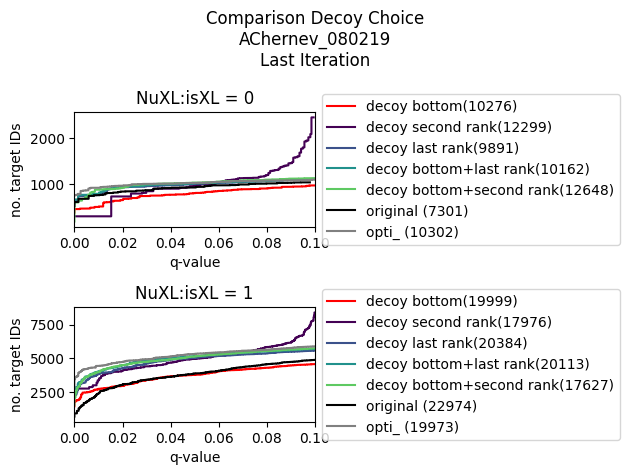

In [38]:
q_val = 'class-specific_q-val'

plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.viridis(np.linspace(0,1,len(dfs_svm_peptide))))
fig, axs = plt.subplots(len(np.unique(df_original[dataset[i]['group']])))
for j in np.unique(df_original[dataset[i]['group']]):
    axs[j].step(dfs_svm[-1].loc[(dfs_svm[-1][dataset[i]['group']]== j) & (dfs_svm[-1][q_val]<= 0.1), q_val],dfs_svm[-1].loc[(dfs_svm[-1][dataset[i]['group']]== j) & (dfs_svm[-1][q_val]<= 0.1), 'cum_target_id'], color = "red", label=f"decoy bottom({len(dfs_svm[-1][dfs_svm[-1][dataset[i]['group']]== j])})")
    axs[j].step(dfs_svm_second_decoy[-1].loc[(dfs_svm_second_decoy[0][dataset[i]['group']]== j) & (dfs_svm_second_decoy[-1][q_val]<= 0.1), q_val],dfs_svm_second_decoy[0].loc[(dfs_svm_second_decoy[0][dataset[i]['group']]== j) & (dfs_svm_second_decoy[-1][q_val]<= 0.1), 'cum_target_id'], label=f"decoy second rank({len(dfs_svm_second_decoy[-1][dfs_svm_second_decoy[-1][dataset[i]['group']]== j])})")
    #axs[j].step(dfs_svm_peptide[0].loc[(dfs_svm_peptide[0][dataset[i]['group']]== j) & (dfs_svm_peptide[0][q_val]<= 0.1), q_val],dfs_svm_peptide[0].loc[(dfs_svm_peptide[0][dataset[i]['group']]== j) & (dfs_svm_peptide[0][q_val]<= 0.1), 'cum_target_id'], label=f"peptide iter 1 ({len(dfs_svm_peptide[0][dfs_svm_peptide[0][dataset[i]['group']]== j])})")
    axs[j].step(dfs_svm_last[-1].loc[(dfs_svm_last[-1][dataset[i]['group']]== j) & (dfs_svm_last[-1][q_val]<= 0.1), q_val],dfs_svm_last[-1].loc[(dfs_svm_last[-1][dataset[i]['group']]== j) & (dfs_svm_last[-1][q_val]<= 0.1), 'cum_target_id'], label=f"decoy last rank({len(dfs_svm_last[-1][dfs_svm_last[-1][dataset[i]['group']]== j])})")
    axs[j].step(dfs_svm_bottom_last[-1].loc[(dfs_svm_bottom_last[-1][dataset[i]['group']]== j) & (dfs_svm_bottom_last[-1][q_val]<= 0.1), q_val],dfs_svm_bottom_last[-1].loc[(dfs_svm_bottom_last[-1][dataset[i]['group']]== j) & (dfs_svm_bottom_last[-1][q_val]<= 0.1), 'cum_target_id'], label=f"decoy bottom+last rank({len(dfs_svm_bottom_last[-1][dfs_svm_bottom_last[-1][dataset[i]['group']]== j])})")
    axs[j].step(dfs_svm_bottom_second[-1].loc[(dfs_svm_bottom_second[-1][dataset[i]['group']]== j) & (dfs_svm_bottom_second[-1][q_val]<= 0.1), q_val],dfs_svm_bottom_second[-1].loc[(dfs_svm_bottom_second[-1][dataset[i]['group']]== j) & (dfs_svm_bottom_second[-1][q_val]<= 0.1), 'cum_target_id'], label=f"decoy bottom+second rank({len(dfs_svm_bottom_second[-1][dfs_svm_bottom_second[-1][dataset[i]['group']]== j])})")
    axs[j].step(df_original.loc[(df_original[dataset[i]['group']]== j) & (df_original[q_val]<= 0.1), q_val],df_original.loc[(df_original[dataset[i]['group']]== j) & (df_original[q_val]<= 0.1), 'cum_target_id'], label=f"original ({len(df_original[df_original[dataset[i]['group']]== j])})", color = "black")
    if dataset[i]['comparison'] != None:
        axs[j].step(df_perc.loc[(df_perc[dataset[i]['group']]== j) & (df_perc[q_val]<= 0.1), q_val],df_perc.loc[(df_perc[dataset[i]['group']]== j) & (df_perc[q_val]<= 0.1), 'cum_target_id'], label=f"{dataset[i]['comparison']} ({len(df_perc[df_perc[dataset[i]['group']]== j])})" , color = "gray")
    axs[j].set_xlim(0,0.1)
    axs[j].set_title(f"{dataset[i]['group']} = {j}")
    axs[j].set_xlabel("q-value")
    axs[j].set_ylabel("no. target IDs")
    lgd = axs[j].legend(loc='center left', bbox_to_anchor=(1, 0.5))
tit = fig.suptitle(f"Comparison Decoy Choice\n{dataset[i]['name']}\nLast Iteration")
fig.tight_layout()
plt.savefig(output_path + f"{dataset[i]['name']}_comparison_decoy_choice_iter_last.png",bbox_extra_artists=(lgd,tit), bbox_inches='tight')
plt.show()

## No rerank

In [39]:
not_reranked_file = f"../data/{dataset[i]['type']}/{dataset[i]['name']}/{dataset[i]['file']}_SVM_filtered_no_rerank_iter_1.pkl"
df_not_reranked = pd.read_pickle(not_reranked_file)

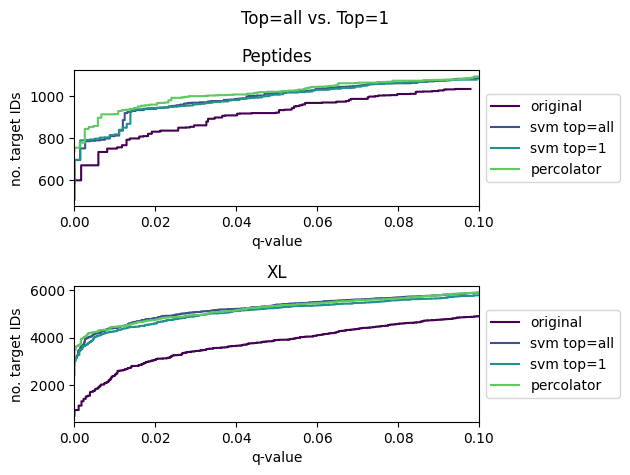

In [40]:
fig, axs = plt.subplots(len(np.unique(df_original[dataset[i]['group']])))
for j in np.unique(df_original[dataset[i]['group']]):
    df_svm = dfs_svm[0]
    axs[j].step(df_original.loc[(df_original[dataset[i]['group']]== j) & (df_original['class-specific_q-val']<= 0.1), 'class-specific_q-val'],df_original.loc[(df_original[dataset[i]['group']]== j) & (df_original['class-specific_q-val']<= 0.1), 'cum_target_id'], label=f"original")
    axs[j].step(df_not_reranked.loc[(df_not_reranked[dataset[i]['group']]== j) & (df_not_reranked['class-specific_q-val']<= 0.1), 'class-specific_q-val'],df_not_reranked.loc[(df_not_reranked[dataset[i]['group']]== j) & (df_not_reranked['class-specific_q-val']<= 0.1), 'cum_target_id'], label=f"svm top=all")
    axs[j].step(df_svm.loc[(df_svm[dataset[i]['group']]== j) & (df_svm['class-specific_q-val']<= 0.1), 'class-specific_q-val'],df_svm.loc[(df_svm[dataset[i]['group']]== j) & (df_svm['class-specific_q-val']<= 0.1), 'cum_target_id'], label=f"svm top=1")
    axs[j].step(df_perc.loc[(df_perc[dataset[i]['group']]== j) & (df_perc['class-specific_q-val']<= 0.1), 'class-specific_q-val'],df_perc.loc[(df_perc[dataset[i]['group']]== j) & (df_perc['class-specific_q-val']<= 0.1), 'cum_target_id'], label=f"percolator")
    axs[j].set_xlim(0,0.1)
    axs[j].set_xlabel("q-value")
    axs[j].set_ylabel("no. target IDs")
    lgd = axs[j].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axs[0].set_title(f"Peptides")
axs[1].set_title(f"XL")
fig.suptitle('Top=all vs. Top=1')
fig.tight_layout()
#plt.savefig(f"../results/{dataset[i]['type']}/{dataset[i]['name']}.png",bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

## Other

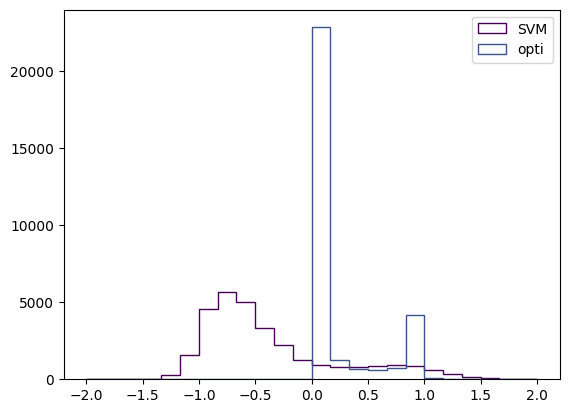

In [41]:
bins = np.linspace(-2,2,25)
plt.hist(df_svm.loc[:, 'Score'], label = 'SVM', histtype='step', bins=bins)
plt.hist(df_perc.loc[:, 'Score'], label='opti', histtype='step', bins = bins)
plt.legend()
plt.show()

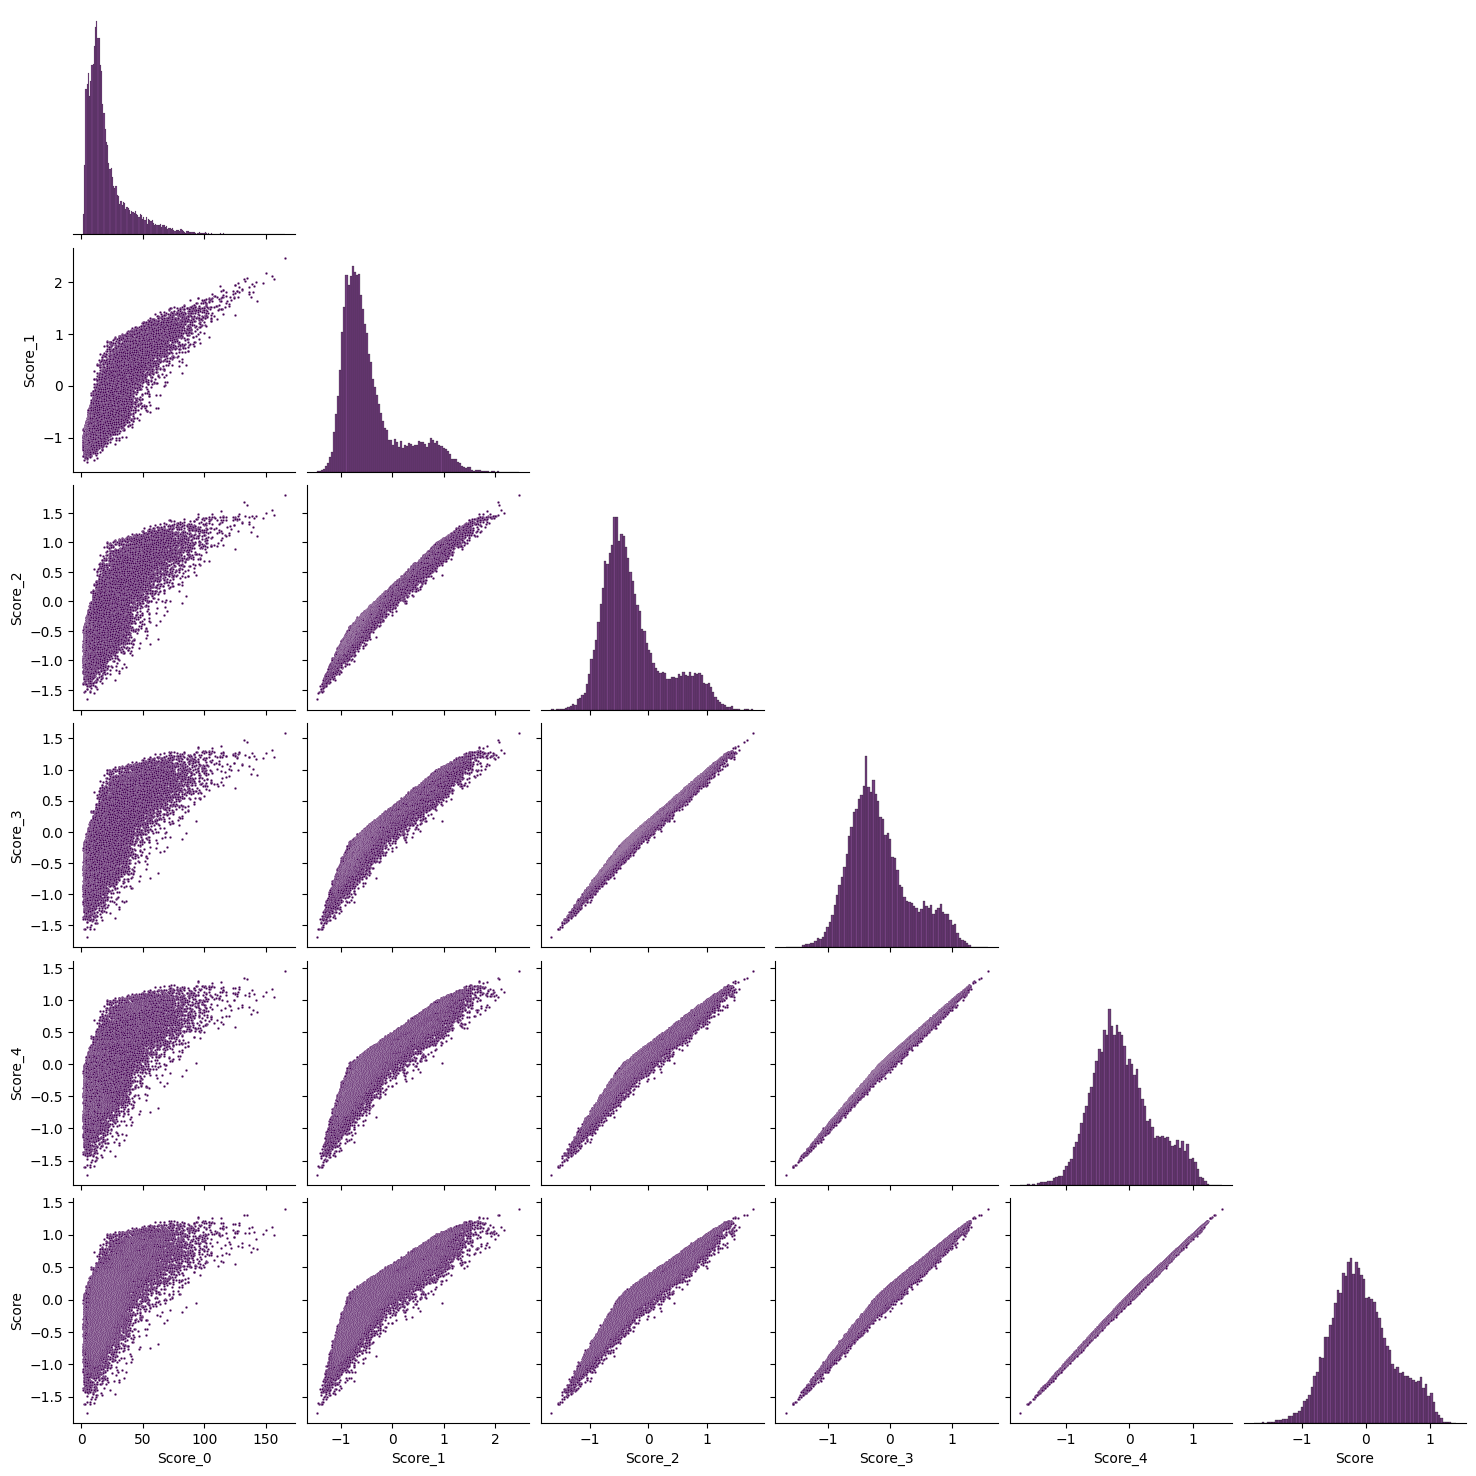

In [42]:
import seaborn as sns
sns.pairplot(dfs_svm[len(dfs_svm) -1].loc[:,['Score_0', 'Score_1', 'Score_2', 'Score_3', 'Score_4', 'Score']], plot_kws={"s": 3}, corner=True)